In [1]:
# project: p2
# submitter: hseverson4
# partner: none
# hours: 8

In [2]:
import loans
import search
import json
from zipfile import ZipFile
from io import TextIOWrapper
import csv
#from graphviz import Graph, Digraph
from time import time
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
fhb = loans.Bank("First Home Bank")

In [5]:
#Q1: what is the average interest rate for the bank?
int_rates_sum=0
num_of_loans = len(fhb)
for i in range(len(fhb)):
    if fhb[i].interest_rate != -1:
        int_rates_sum += fhb[i].interest_rate
    else:
        num_of_loans -= 1
int_rates_sum / num_of_loans

2.962962962962963

In [6]:
#Q2: how many applicants are there per loan, on average?
total_applicants = 0
for i in range(len(fhb)):
    total_applicants += len(fhb[i].applicants)
total_applicants / len(fhb)

1.5777777777777777

In [7]:
#Q3: what is the distribution of ages?
ages = {}
for i in range(len(fhb)):
    for j in range(len(fhb[i].applicants)):
        age = fhb[i].applicants[j].age
        if age not in ages:
            ages[age] = 1
        else:
            ages[age] += 1
ages

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [8]:
#Q4: how many interest rate values are missing?
fhb_tree = search.BST()
for i in range(len(fhb)):
    fhb_tree.add(fhb[i].interest_rate, fhb[i])

len(fhb_tree[-1])

18

In [9]:
#Q5: how tall is the tree?
def height(node):
    if node is None: 
        return 0
    return 1 + max(height(node.left), height(node.right))

height(fhb_tree.root)

9

In [10]:
uwcu = loans.Bank("University of Wisconsin Credit Union")
loan_add_times = {}
uwcu_tree = search.BST()
time0=time()
for i in range(len(uwcu)):
    uwcu_tree.add(uwcu[i].interest_rate, uwcu[i])
    loan_add_times[i+1] = time() - time0

Text(0, 0.5, 'Total Elapsed Milliseconds')

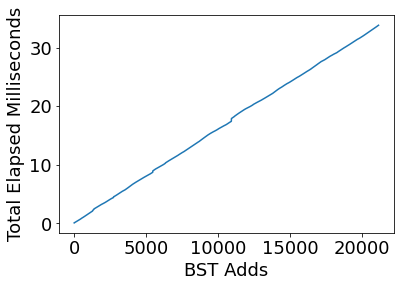

In [11]:
#Q6: how long does it take to add the loans to the tree?
ax = (pd.Series(loan_add_times)*1000).plot.line(fontsize = 18)
plt.locator_params(axis = "y", nbins = 4)
ax.set_xlabel("BST Adds",fontsize=18)
ax.set_ylabel("Total Elapsed Milliseconds",fontsize=18)

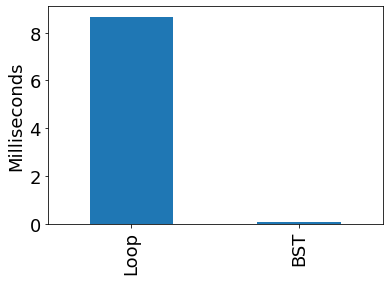

In [12]:
#Q7: how fast are tree lookups?
times = {}
t0 = time()
count = 0
for i in range(len(uwcu)):
    if uwcu[i].interest_rate == -1:
        count+=1
t_end = time()
times["Loop"] = (t_end - t0)*1000

t1 = time()
tree_lookup = len(uwcu_tree[-1])
t1_end = time()
times["BST"] = (t1_end - t1)*1000

pd.Series(times)
ax = pd.Series(times).plot.bar(fontsize = 18)
ax.set_ylabel("Milliseconds",fontsize=18)
None

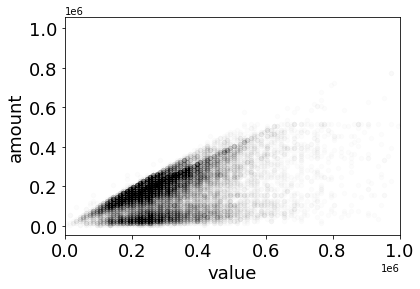

In [13]:
#Q8: what is the relationship between property value and loan amount?
property_vs_loan = {"value": {}, "amount": {}}
for i in range(len(uwcu)):
    if uwcu[i].property_value == -1:
        continue
    property_vs_loan["value"][i] = uwcu[i].property_value
    property_vs_loan["amount"][i] = uwcu[i].loan_amount

ax = pd.DataFrame(property_vs_loan).plot.scatter(x = "value", y = "amount", color = "black", alpha = 0.01, fontsize = 18)
ax.set_xlim(xmin=0, xmax=1e6)
ax.set_xlabel(xlabel = "value", fontsize=18)
ax.set_ylabel(ylabel = "amount", fontsize = 18)
None

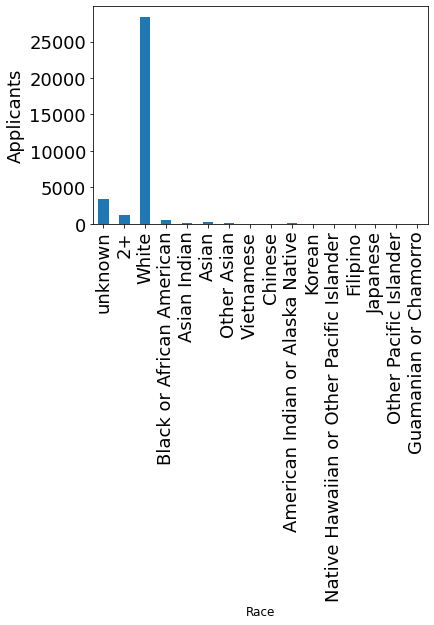

In [14]:
#Q9: what is the distribution of race for UWCU loan applicants?
race_counts = {"unknown":0, "2+":0}
for i in range(len(uwcu)):
    applicants = uwcu[i].applicants
    for applicant in applicants:
        races = applicant.race
        if len(races) == 0:
            race_counts["unknown"]+=1
        elif len(races) > 1:
            race_counts["2+"] += 1
        else:
            assert len(races) == 1
            race = list(races)[0]
            if race not in race_counts:
                race_counts[race] = 1
            else:
                race_counts[race] += 1
                
race_counts
ax = pd.Series(race_counts).plot.bar(fontsize = 18)
ax.set_ylabel("Applicants",fontsize=18)
ax.set_xlabel("Race",fontsize=12)
None

In [15]:
#Q10: how many nodes are in the tree?
def count_nodes(node):
    if node is None: 
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)

count_nodes(uwcu_tree.root)

32